In [0]:
from scipy import stats as st
from matplotlib import pyplot as pyplot
import numpy as np

$ \mathbf{X}_1 \sim \alpha \cdot \mathcal{N}(\mathbf{0}, \mathbf{1}) + (1-\alpha)\cdot \mathcal{N}(\mathbf{2}, \mathbf{4}) $

$ \mathbf{X}_2 \sim \alpha \cdot \mathcal{N}(\mathbf{0}, \mathbf{1}) + (1-\alpha) \cdot \mathcal{N}(\mathbf{2}, \mathbf{4}) + \delta$

Распределение является гауссовой смесью $\rightarrow 0 \le \alpha \le 1$

In [0]:
n = 10000
weights = [alpha, 1 - alpha]
norm_params = np.array([[0, 1],
                        [2, 4]])

In [0]:
def data_generation(alpha, seed):
  weights = [alpha, 1 - alpha]
  numpy.random.seed(seed)
  n_components = norm_params.shape[0]
  mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
  y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                    dtype=np.float64)
  return y

def prob_func(y, alpha, delta):
  weights = [alpha, 1 - alpha]
  xs = np.linspace(y.min(), y.max(), 200)
  ys = np.full(len(xs), delta)
  for (l, s), w in zip(norm_params, weights):
      ys += ss.norm.pdf(xs, loc=l, scale=s) * w
  return xs, ys

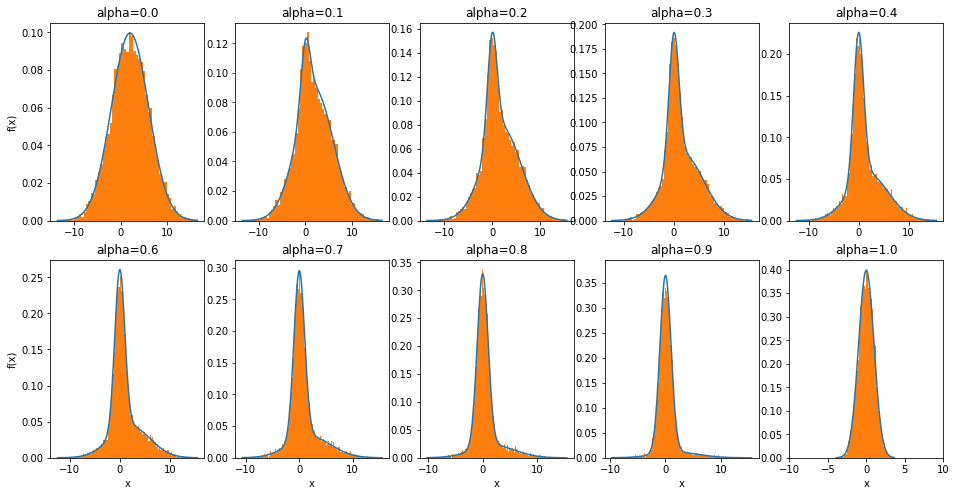

In [0]:
fig = plt.figure(figsize=(16, 8))
raws = 2
columns = 5
for i, alpha in enumerate(np.linspace(0., 1., num=10)):
  y = data_generation(alpha, i)
  xs, ys = prob_func(y, alpha, 0.)
  fig.add_subplot(raws, columns, i+1)
  plt.plot(xs, ys)
  plt.hist(y, bins="fd", density=True)
  if i % 5 == 0:
    plt.ylabel("f(x)")
  if i > 4 :
    plt.xlabel("x")
  plt.title(f'alpha={round(alpha, 1)}')
plt.xlim(-10, 10)
plt.show()